# OpenStreetMaps (OSM) Model

## Imports

In [1]:
import sys
sys.path.insert(0, '../utils')
import model_utils
import data_utils

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

## File Locations

In [5]:
bucket_name = 'tm-geospatial'
directory = 'poverty-prediction-datasets'

ntl_summary_stats_file = '../data/nightlights_summary_stats.csv'
dhs_indicators_file = '../data/dhs_indicators.csv'

osm_roads_file = '../data/osm_roads.csv'
osm_buildings_file = '../data/osm_buildings.csv'
osm_pois_file = '../data/osm_pois.csv'

## Download Datasets

In [6]:
# Download from Google Cloud Storage
data_utils.download_from_bucket('dhs_indicators.csv', directory, dhs_indicators_file, bucket_name);
data_utils.download_from_bucket('nightlights_summary_stats.csv', directory, ntl_summary_stats_file, bucket_name);
data_utils.download_from_bucket('osm_roads.csv', directory, osm_roads_file, bucket_name);
data_utils.download_from_bucket('osm_buildings.csv', directory, osm_buildings_file, bucket_name);
data_utils.download_from_bucket('osm_pois.csv', directory, osm_pois_file, bucket_name);

../data/dhs_indicators.csv successfully downloaded
../data/nightlights_summary_stats.csv successfully downloaded
../data/osm_roads.csv successfully downloaded
../data/osm_buildings.csv successfully downloaded
../data/osm_pois.csv successfully downloaded


## Load Datasets

In [8]:
# Load DHS indicators and nighttime lights
dhs_indicators = pd.read_csv(dhs_indicators_file)
ntl_summary_stats = pd.read_csv(ntl_summary_stats_file)

# Load OSM datasets
roads = pd.read_csv(osm_roads_file)
buildings = pd.read_csv(osm_buildings_file)
pois = pd.read_csv(osm_pois_file)

# Define feature columns
road_cols = roads.columns[1:]
building_cols = buildings.columns[1:]
poi_cols = pois.columns[1:]
ntl_cols = ntl_summary_stats.columns[1:]

# Get list of columns
osm_cols = list(road_cols) + list(building_cols) + list(poi_cols)
osm_ntl_cols = list(osm_cols) + list(ntl_cols)

## Combine Features

In [5]:
# Merge roads + buildings + pois
osm = roads.merge(buildings, on='DHSCLUST')
osm = osm.merge(pois, on='DHSCLUST')
print("Shape of osm dataframe: {}".format(osm.shape))

# Merge osm + nightlights
osm_ntl = osm.merge(ntl_summary_stats, on='DHSCLUST')
print("Shape of osm+ntl dataframe: {}".format(osm_ntl.shape))

# merge dhs + osm
dhs = dhs_indicators.merge(osm_ntl, left_on='Cluster number', right_on='DHSCLUST')

Shape of osm dataframe: (1214, 146)
Shape of osm+ntl dataframe: (1214, 154)


## Spearman and Pearsons Correlation

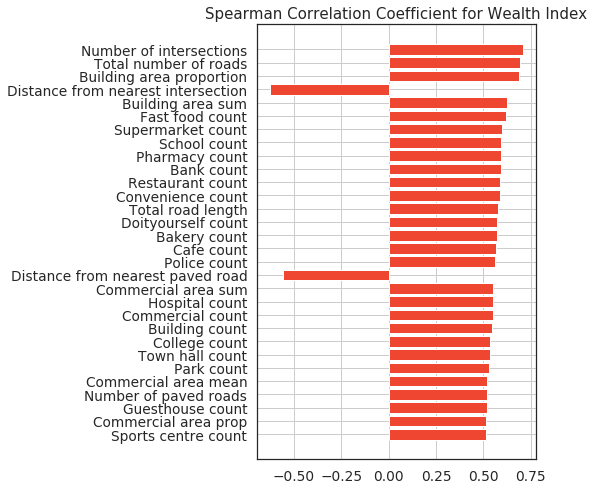

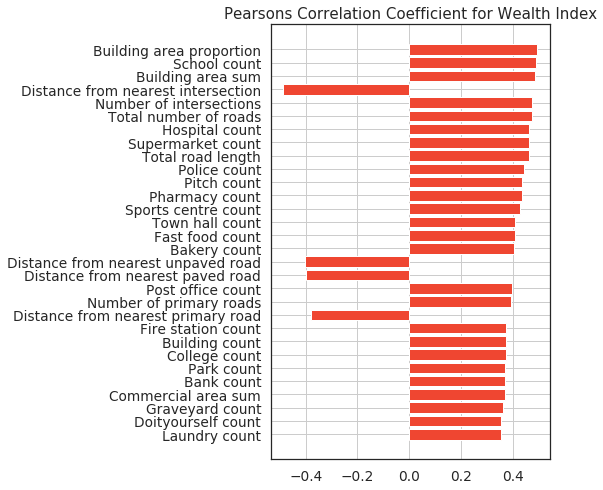

In [6]:
data_utils.plot_corr(
    data=dhs,
    features_cols=osm_cols,
    indicator = 'Wealth Index',
    max_n=30,
    figsize=(5,8)
);

## Machine Learning Pipeline

### Configuration

In [7]:
# Define scoring metrics
scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

# Define indicators of interest
indicators = [
    'Wealth Index',
    'Log Wealth Index',
    'Education completed (years)',
    'Access to electricity',
    'Access to water (minutes)'
]

### Road Features

Socioeconomic indicator: Wealth Index
test_neg_mse : -2265032554.9125
[-2.46213355e+09 -2.31575038e+09 -1.95314223e+09 -2.28454870e+09
 -2.30958792e+09]
test_r2 : 0.5475
[0.52039102 0.57122664 0.55517629 0.56502456 0.52580626]
fit_time : 1081.0793
[1077.62514544 1075.86650133 1086.22367048 1083.01487279 1082.66651821]
train_neg_mse : -1093299447.7017
[-9.31288730e+08 -1.00337105e+09 -1.05082951e+09 -9.47458207e+08
 -1.53354974e+09]
score_time : 0.9237
[1.08916712 1.05619574 0.85089087 1.08010459 0.54202032]
train_r2 : 0.7829
[0.81307867 0.79692152 0.79752935 0.80943872 0.69769384]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1063, n_jobs=-1,
           oob_score=False, random_state=

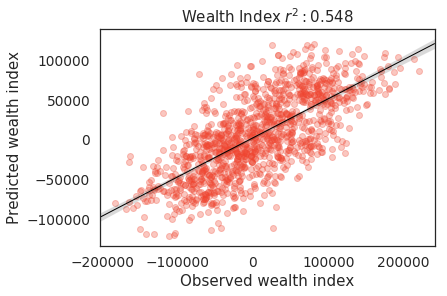

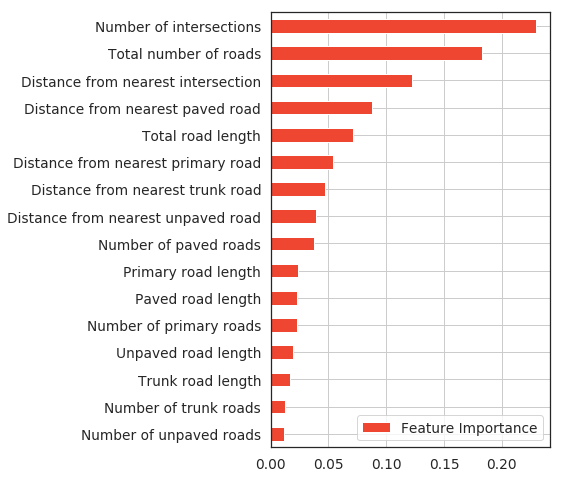

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.2088
[-0.09112989 -0.09973597 -0.10862806 -0.64474233 -0.09967686]
test_r2 : 0.4395
[0.50352567 0.53016981 0.44878348 0.20788675 0.50688628]
fit_time : 1170.7601
[1170.71291828 1171.39798999 1171.53807616 1176.80780745 1163.34369659]
train_neg_mse : -0.1597
[-0.19042323 -0.18867163 -0.18607674 -0.0422163  -0.19095406]
score_time : 0.6806
[0.61035585 0.59175396 0.50874686 0.99425697 0.69775558]
train_r2 : 0.5305
[0.46646761 0.46239956 0.47549441 0.78839145 0.45958733]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=495, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


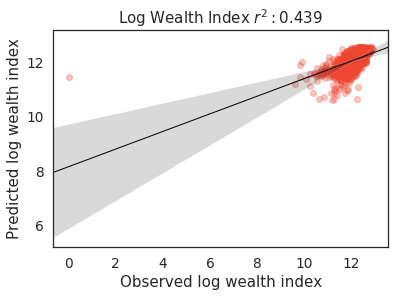

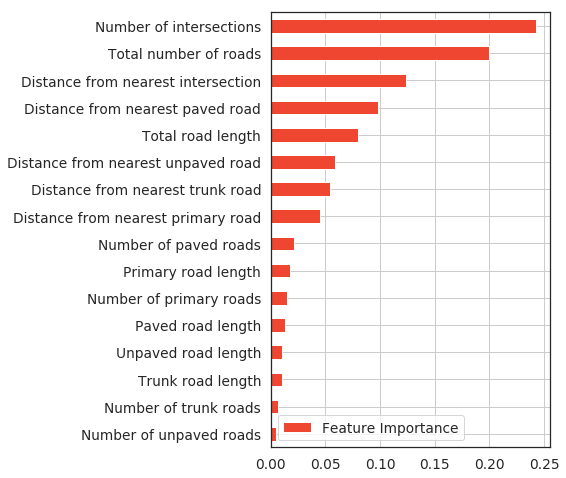

Socioeconomic indicator: Education completed (years)
test_neg_mse : -3.1186
[-2.98790959 -3.38333946 -3.22410503 -2.98109739 -3.01630484]
test_r2 : 0.4297
[0.40955565 0.45005146 0.38530384 0.48773813 0.41605188]
fit_time : 1170.0957
[1173.67569685 1168.36190319 1170.33213639 1168.41407681 1169.69460511]
train_neg_mse : -1.4827
[-1.41406875 -1.4566163  -1.62950583 -1.40910426 -1.504175  ]
score_time : 1.0006
[0.89756155 0.89678097 1.35448503 0.98180604 0.87212586]
train_r2 : 0.7308
[0.74765899 0.72759722 0.707139   0.74049974 0.73114913]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1228, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


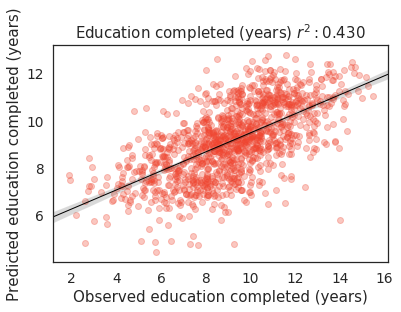

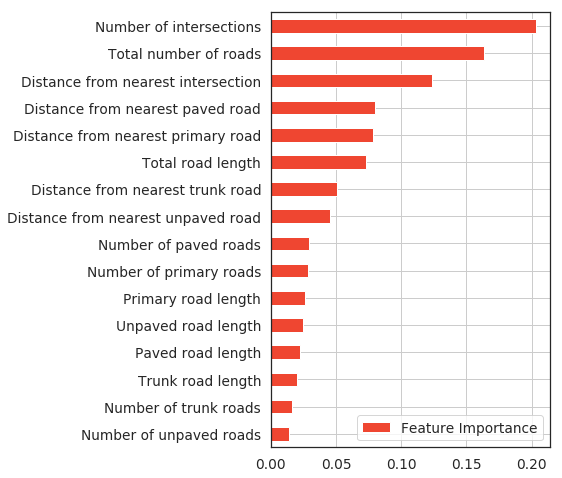

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0152
[-0.01033866 -0.01424935 -0.01665173 -0.01820698 -0.01651353]
test_r2 : 0.2685
[0.1994208  0.26216136 0.30182975 0.30866445 0.27053098]
fit_time : 1228.7501
[1222.08848548 1243.36523914 1232.91080546 1219.69673467 1225.6892736 ]
train_neg_mse : -0.0112
[-0.01189308 -0.01274061 -0.01073843 -0.00787932 -0.01294126]
score_time : 1.5820
[0.94737768 3.76113653 0.68466663 0.9826405  1.53406644]
train_r2 : 0.4692
[0.48485031 0.40920129 0.47424265 0.60152016 0.37618585]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=495, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


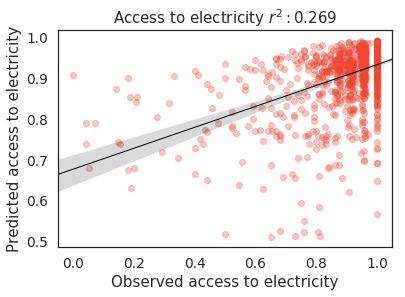

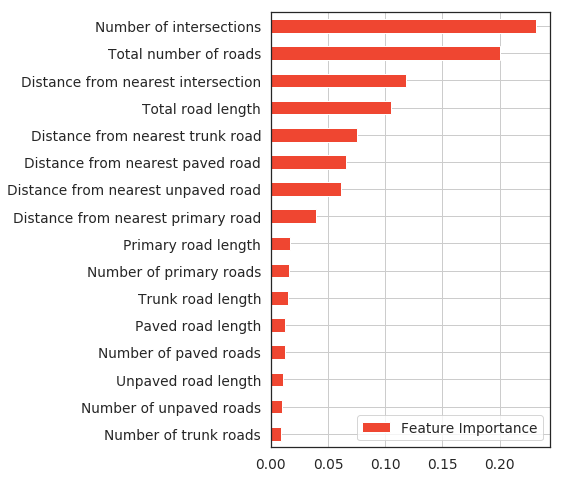

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -66.3390
[-159.37965581  -65.75577969  -47.30913727  -24.58126145  -34.66938445]
test_r2 : -0.0321
[ 0.05777874  0.03924821 -0.06297781 -0.00297916 -0.19137041]
fit_time : 1112.7347
[1099.63729453 1117.48884511 1113.88248754 1113.67163253 1118.99345303]
train_neg_mse : -43.7079
[-36.12573021 -50.17050827 -54.3717744  -58.91266694 -18.95876199]
score_time : 0.8099
[0.83308768 0.93449426 0.54014587 0.70803189 1.03355742]
train_r2 : 0.3276
[0.13374197 0.25162036 0.25530055 0.24424047 0.75329326]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=495, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start

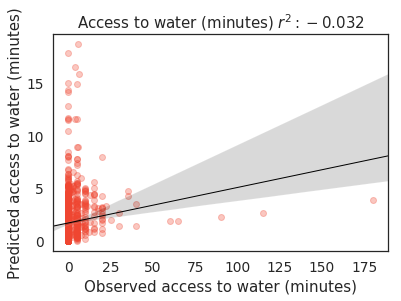

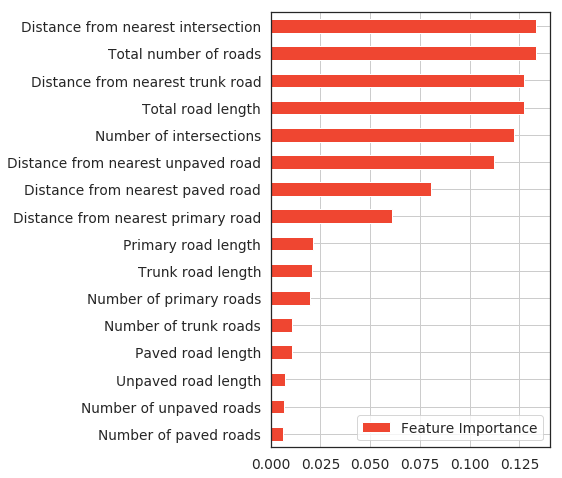

In [12]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=road_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
    plot_importance=True
)

## Buildings

Socioeconomic indicator: Wealth Index
test_neg_mse : -2435564888.3154
[-2.49213251e+09 -2.43016980e+09 -2.09640309e+09 -2.47720230e+09
 -2.68191674e+09]
test_r2 : 0.5130
[0.5145474  0.55004128 0.52254896 0.52834353 0.44936146]
fit_time : 891.2939
[894.78696537 891.89696598 888.47292519 886.0787971  895.23390603]
train_neg_mse : -1720698832.5682
[-1.82801944e+09 -1.81306692e+09 -1.87091941e+09 -1.79464066e+09
 -1.29684773e+09]
score_time : 0.9235
[0.93565178 1.15782428 1.01477265 0.82500505 0.68440938]
train_r2 : 0.6578
[0.63309357 0.63304216 0.63951691 0.63904579 0.74435453]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, ve

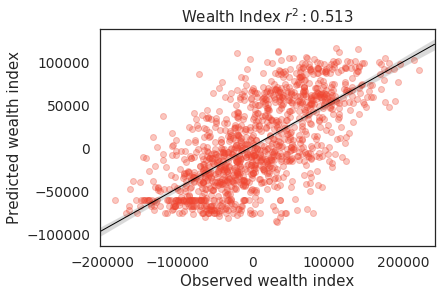

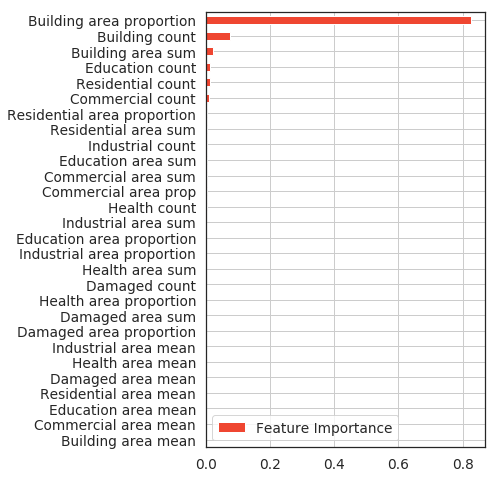

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.2249
[-0.10055641 -0.11244694 -0.11710577 -0.67389259 -0.12069235]
test_r2 : 0.3806
[0.45217015 0.47029174 0.40576462 0.17207352 0.4029201 ]
fit_time : 930.0586
[928.39289284 932.58437824 930.4125638  934.11727333 924.78611207]
train_neg_mse : -0.2000
[-0.22994706 -0.22915224 -0.22710244 -0.08696135 -0.22703369]
score_time : 1.1151
[1.22948003 1.25846314 1.13388324 1.187814   0.7660985 ]
train_r2 : 0.3968
[0.3557288  0.34705423 0.35985284 0.56410755 0.35747958]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


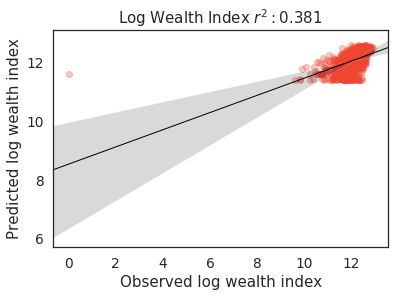

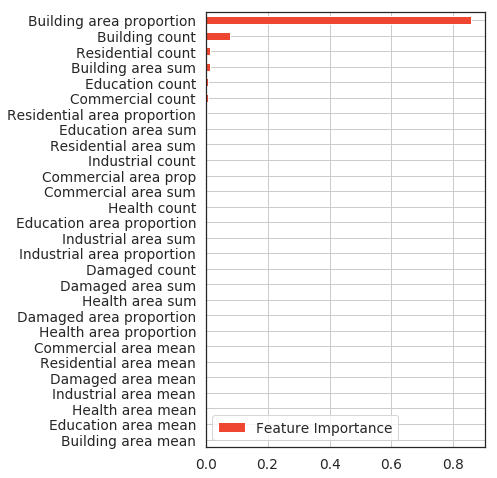

Socioeconomic indicator: Education completed (years)
test_neg_mse : -3.3140
[-3.03404202 -3.68050218 -3.48606    -3.29098356 -3.07846882]
test_r2 : 0.3952
[0.40043937 0.40174882 0.33536046 0.43448832 0.40401711]
fit_time : 928.3843
[928.27242374 926.66985369 927.49225688 930.78809547 928.69903708]
train_neg_mse : -2.6461
[-2.54077291 -2.80751482 -2.45690008 -2.89162741 -2.53372572]
score_time : 0.6798
[0.64181495 0.7104888  0.82052064 0.3328979  0.89309549]
train_r2 : 0.5189
[0.54659828 0.47496479 0.55843655 0.46747868 0.54713091]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=8, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=1244, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


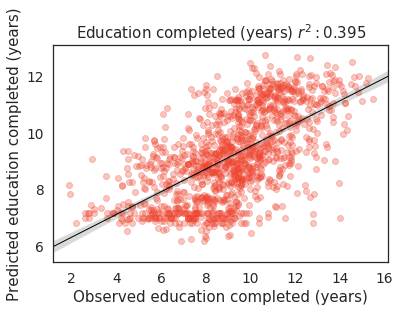

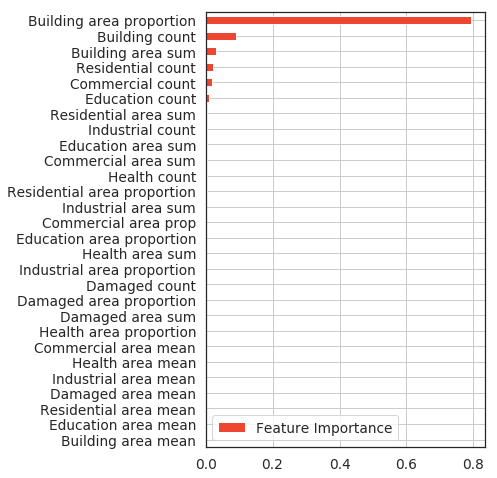

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0168
[-0.01146852 -0.01521158 -0.01874097 -0.0202785  -0.01822411]
test_r2 : 0.1927
[0.11192919 0.21233635 0.21423266 0.23000713 0.19496752]
fit_time : 688.5071
[687.72736764 688.89481592 686.03003025 687.7198348  692.16342545]
train_neg_mse : -0.0140
[-0.01562366 -0.0140981  -0.01359612 -0.01352847 -0.01321477]
score_time : 0.7101
[0.48939061 0.61989737 0.78530121 0.47703433 1.17899656]
train_r2 : 0.3365
[0.32325975 0.34625275 0.33432943 0.31582637 0.3630018 ]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1228, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


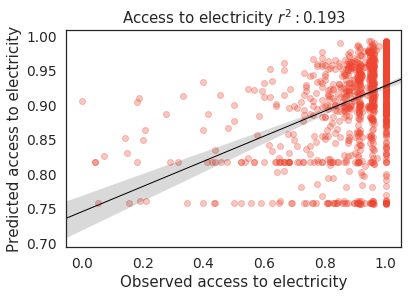

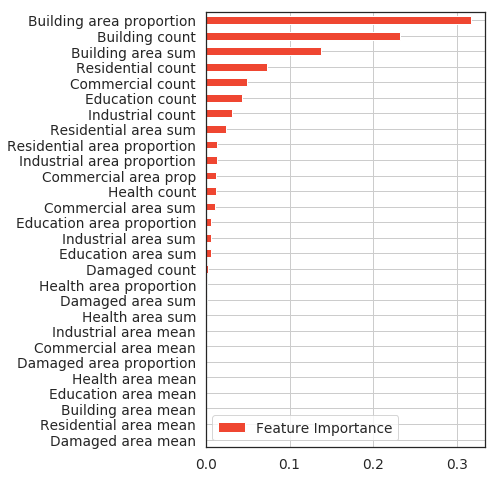

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -65.7563
[-165.61871752  -67.30317264  -43.68782387  -24.65476462  -27.51679254]
test_r2 : 0.0209
[ 0.02089464  0.01663939  0.01838862 -0.00597828  0.05441954]
fit_time : 654.3818
[648.77129865 656.85668492 652.23213291 658.87833834 655.17056942]
train_neg_mse : -62.8821
[-37.46297222 -63.37539677 -69.01453067 -71.54242965 -73.01514066]
score_time : 0.5938
[0.53938818 0.75807691 0.56135035 0.53605485 0.57415199]
train_r2 : 0.0686
[0.10167627 0.05464668 0.05474699 0.0822199  0.04986794]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=9,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=592, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False

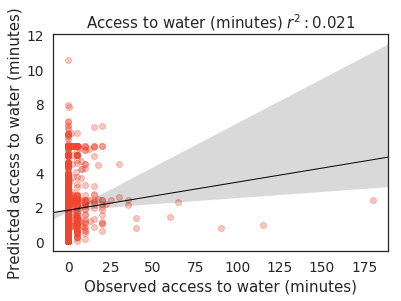

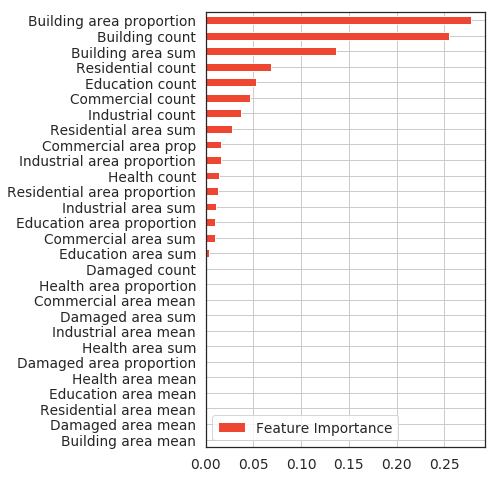

In [13]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=building_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
    plot_importance=True
)

## Points of Interest

Socioeconomic indicator: Wealth Index
test_neg_mse : -2542409198.8760
[-2.62039902e+09 -2.66447758e+09 -2.25994425e+09 -2.57608389e+09
 -2.59114125e+09]
test_r2 : 0.4918
[0.48956185 0.50665796 0.48530283 0.50951659 0.46799905]
fit_time : 745.8989
[736.56677842 745.52135992 749.8605969  749.92769933 747.61804318]
train_neg_mse : -1524308537.8989
[-1.42677409e+09 -1.74742947e+09 -1.51380525e+09 -1.44974981e+09
 -1.48378407e+09]
score_time : 0.8028
[1.03297997 0.98698902 0.60534668 0.68340325 0.70505571]
train_r2 : 0.6968
[0.71362855 0.64632693 0.70832459 0.70841333 0.70750407]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1347, n_jobs=-1,
           oob_score=False, random_state=42, v

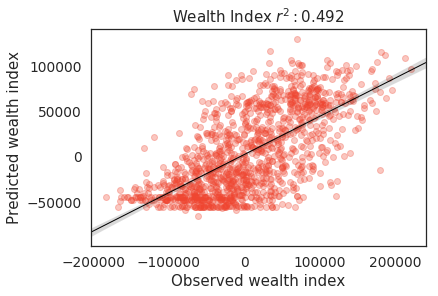

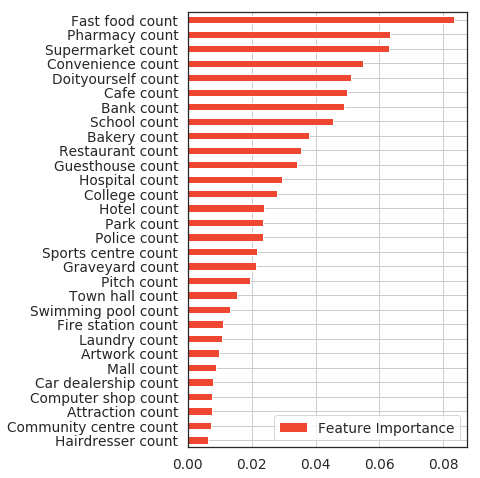

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.2312
[-0.10703112 -0.11736975 -0.11844357 -0.69541168 -0.11774235]
test_r2 : 0.3652
[0.41689599 0.44710166 0.39897616 0.14563574 0.4175141 ]
fit_time : 797.0457
[796.90074706 799.98683286 799.13001919 794.22887039 794.98227239]
train_neg_mse : -0.1984
[-0.2293368  -0.22798086 -0.22298857 -0.08758135 -0.22414331]
score_time : 0.9462
[1.17462039 0.90699506 0.66909957 0.93726349 1.04289246]
train_r2 : 0.4012
[0.35743864 0.35039194 0.37144883 0.56099983 0.36565956]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=9,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1785, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


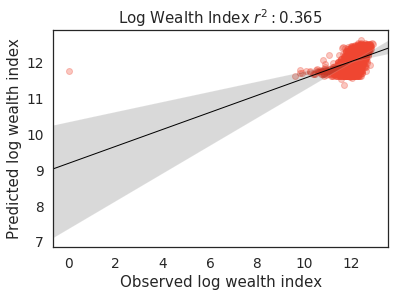

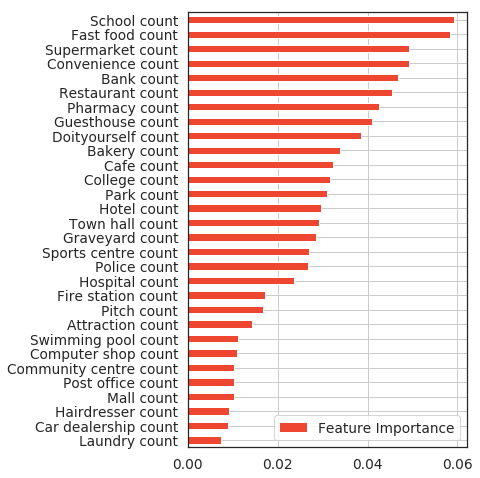

Socioeconomic indicator: Education completed (years)
test_neg_mse : -3.3252
[-3.04734467 -3.75439836 -3.52707324 -3.20504179 -3.09235296]
test_r2 : 0.3931
[0.39781062 0.38973729 0.32754102 0.44925627 0.40132918]
fit_time : 743.5874
[742.07948017 746.18159676 744.54948545 745.70435333 739.42199278]
train_neg_mse : -2.3062
[-2.46312533 -2.37309729 -2.08903007 -2.11861469 -2.48705802]
score_time : 0.8389
[0.75420785 0.82753062 0.68622971 1.10600233 0.82060575]
train_r2 : 0.5813
[0.56045451 0.5562055  0.62455155 0.60983649 0.55547213]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=9,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=1785, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


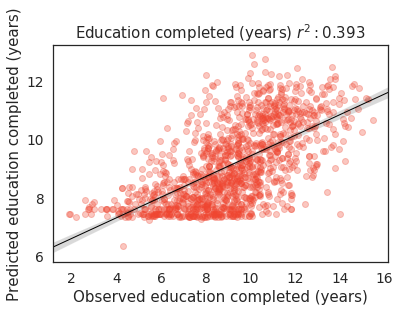

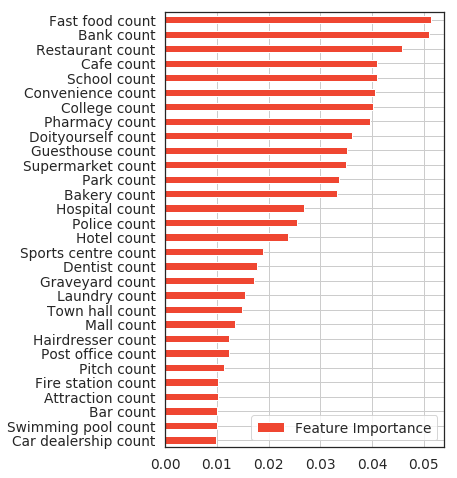

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0171
[-0.01076011 -0.01574603 -0.01968814 -0.02050685 -0.01896777]
test_r2 : 0.1819
[0.16678543 0.18466208 0.17451979 0.22133657 0.16211717]
fit_time : 742.4342
[745.05537319 743.78389049 742.01248145 745.14444137 736.17481065]
train_neg_mse : -0.0154
[-0.01705694 -0.01566125 -0.01418246 -0.01454273 -0.01556247]
score_time : 0.8257
[1.07251215 0.57406378 1.03817058 0.78099847 0.66271448]
train_r2 : 0.2710
[0.2611771  0.27376725 0.30562181 0.2645322  0.24983439]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=1063, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


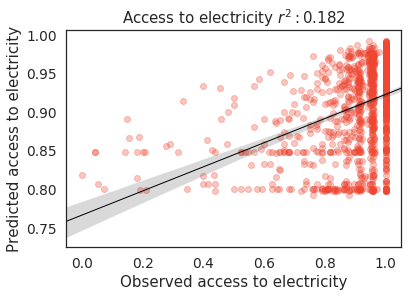

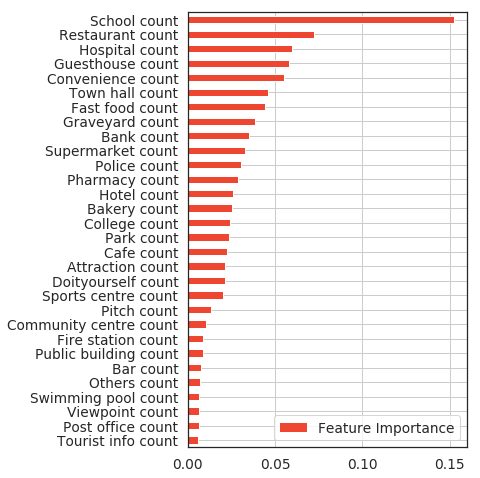

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -65.0428
[-165.125984    -65.21296039  -44.56886682  -23.54215712  -26.76413141]
test_r2 : 0.0379
[ 0.02380758  0.04717929 -0.00140732  0.03941899  0.08028381]
fit_time : 700.7659
[700.79446054 701.90456748 699.28624177 702.9782846  698.86589217]
train_neg_mse : -60.1660
[-27.76243182 -63.23085245 -65.43362221 -71.81108324 -72.59221359]
score_time : 0.7017
[1.0880959  0.42284465 0.69263172 0.74940991 0.55554223]
train_r2 : 0.1258
[0.3342853  0.0568028  0.10379267 0.07877349 0.05537141]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=8,
           min_weight_fraction_leaf=0.0, n_estimators=346, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

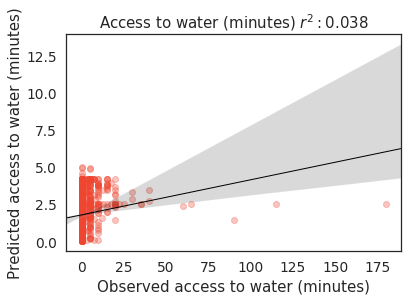

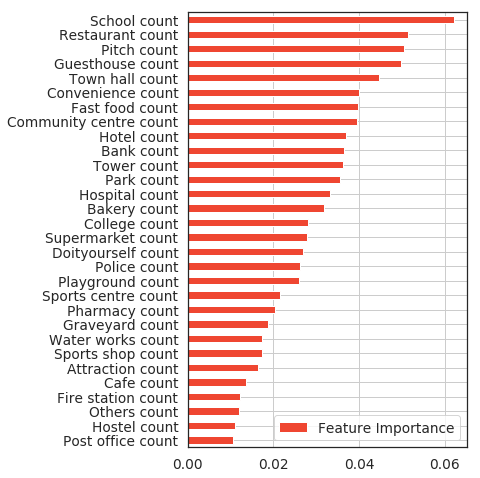

In [14]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=poi_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
    plot_importance=True
)

## All OSM Features

Socioeconomic indicator: Wealth Index
test_neg_mse : -2045156640.2360
[-2.08647196e+09 -2.09080249e+09 -1.78310360e+09 -2.12328401e+09
 -2.14212114e+09]
test_r2 : 0.5913
[0.59356767 0.61287692 0.59390221 0.59572917 0.56018975]
fit_time : 1197.3756
[1193.71870112 1199.30161881 1202.3340652  1200.50257921 1191.02088785]
train_neg_mse : -756344132.7279
[-7.95208475e+08 -7.21588122e+08 -7.50695609e+08 -7.41965106e+08
 -7.72263352e+08]
score_time : 0.8586
[0.76917696 0.81609511 0.76240468 0.96028543 0.98516273]
train_r2 : 0.8496
[0.84039169 0.85395331 0.85535824 0.85076933 0.84776499]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1506, n_jobs=-1,
           oob_score=False, random_state=4

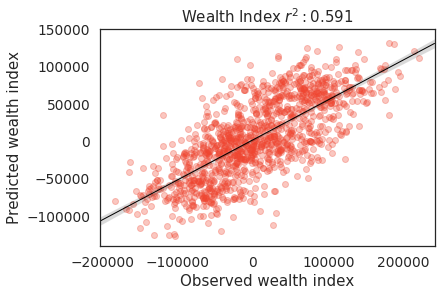

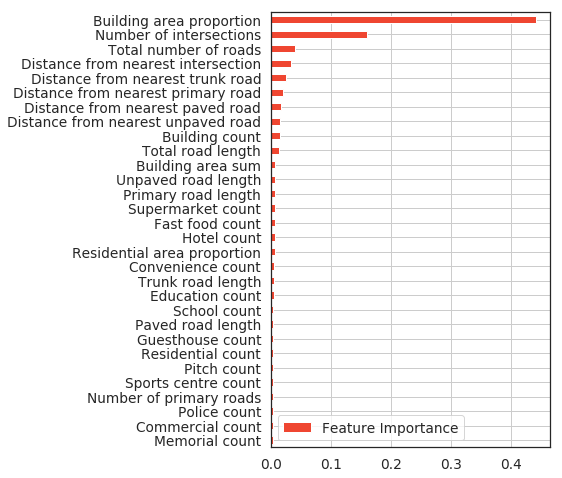

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.2029
[-0.08013483 -0.09485428 -0.10126347 -0.64299913 -0.09534536]
test_r2 : 0.4682
[0.56342662 0.55316616 0.48615395 0.2100284  0.52831474]
fit_time : 1195.5539
[1179.36611438 1197.24530554 1200.99606419 1201.31292939 1198.84892964]
train_neg_mse : -0.1490
[-0.18360898 -0.15894673 -0.17843113 -0.03460828 -0.18925079]
score_time : 0.6126
[0.86121821 0.58923602 0.4566772  0.70705104 0.44859099]
train_r2 : 0.5641
[0.48555993 0.54709762 0.49704556 0.82652655 0.46440771]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


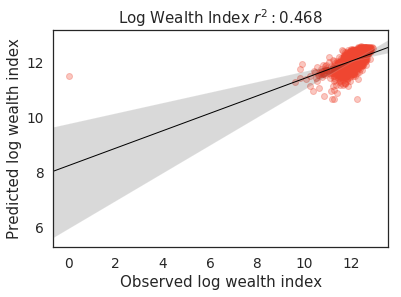

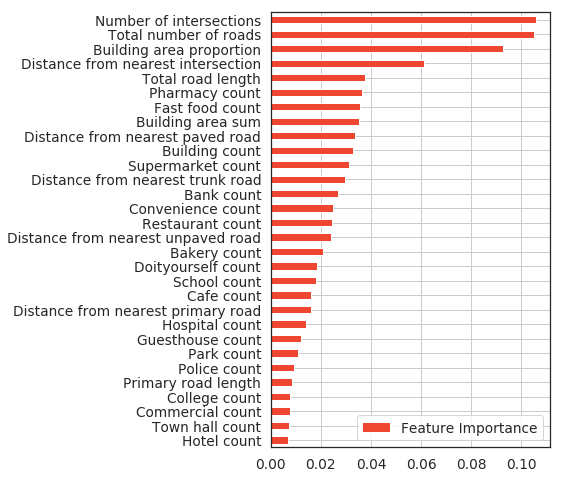

Socioeconomic indicator: Education completed (years)
test_neg_mse : -2.9681
[-2.64444275 -3.34941683 -3.11558019 -2.90009875 -2.83107444]
test_r2 : 0.4585
[0.47742854 0.45556545 0.40599479 0.50165667 0.45191196]
fit_time : 1142.8743
[1144.89685583 1141.94226289 1143.64049029 1141.97942805 1141.91260362]
train_neg_mse : -1.5523
[-1.68102003 -1.63534414 -1.65295657 -1.14172411 -1.65052908]
score_time : 0.8601
[0.70471025 0.76528025 0.81444621 1.20464349 0.81131458]
train_r2 : 0.7184
[0.70002145 0.69417321 0.70292435 0.7897404  0.70499033]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1506, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


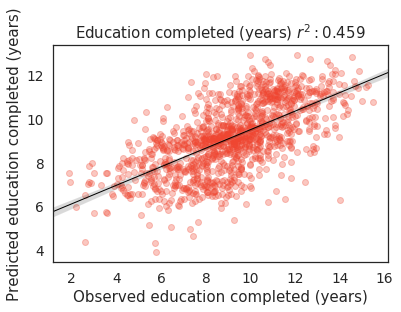

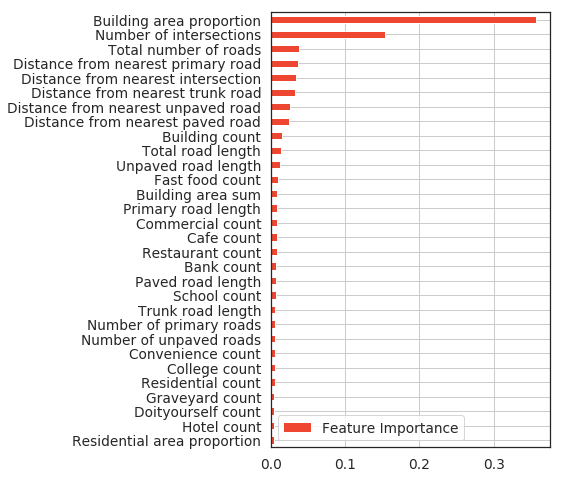

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0148
[-0.01029792 -0.0137358  -0.0161764  -0.01754205 -0.01611758]
test_r2 : 0.2870
[0.20257537 0.28875291 0.32175917 0.33391263 0.28802183]
fit_time : 1042.7019
[1040.47885656 1037.57052827 1046.22671604 1045.20638204 1044.02705431]
train_neg_mse : -0.0095
[-0.00981843 -0.01093421 -0.00544398 -0.01013783 -0.01107927]
score_time : 0.9051
[1.01791859 0.87194514 0.72030663 0.6097796  1.30556726]
train_r2 : 0.5509
[0.57471399 0.49296646 0.73346087 0.48730078 0.46594036]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


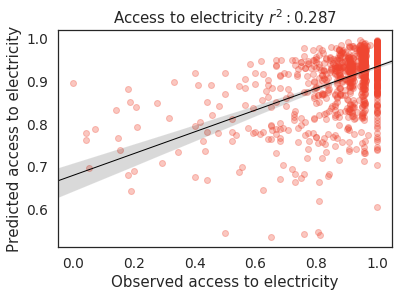

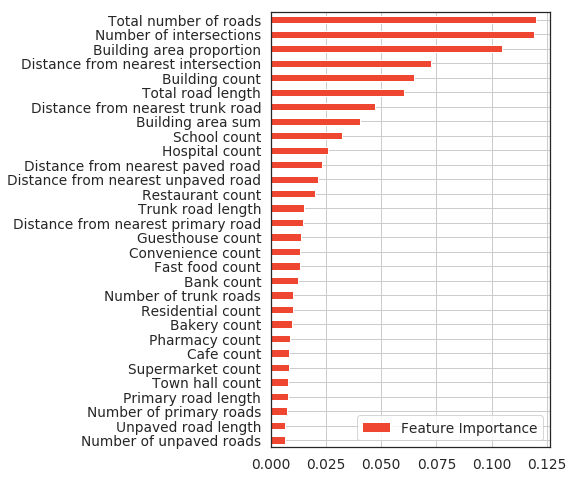

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -64.0270
[-159.38690965  -65.11406209  -44.093035    -24.19794537  -27.34281189]
test_r2 : 0.0377
[0.05773586 0.04862429 0.00928403 0.01266113 0.06039817]
fit_time : 799.3642
[802.0705359  803.87356758 802.48757982 799.46827197 788.92126226]
train_neg_mse : -52.3055
[-26.91975992 -54.99484684 -59.63245551 -56.31686498 -63.66361943]
score_time : 0.6339
[0.61495972 0.82825208 0.81771684 0.21029687 0.69811368]
train_r2 : 0.2333
[0.35449171 0.17965703 0.18324797 0.27754064 0.1715575 ]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=495, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


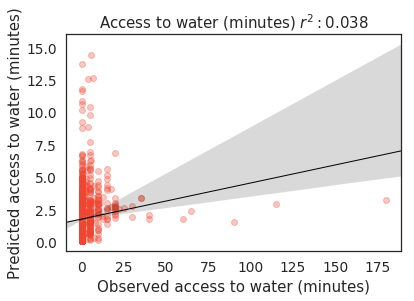

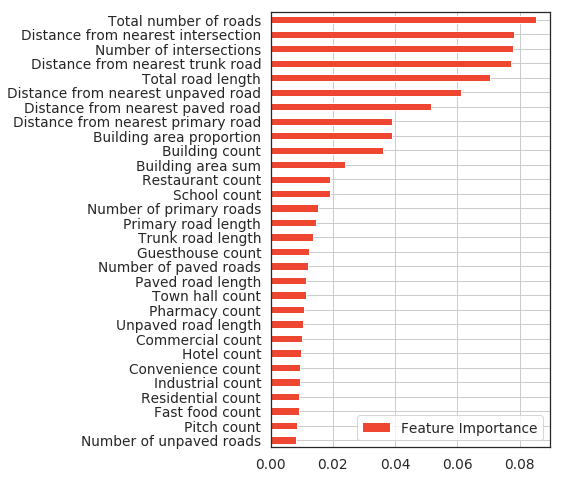

In [15]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=osm_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
    plot_importance=True
)

## OSM + NTL

Socioeconomic indicator: Wealth Index
test_neg_mse : -1910057074.9177
[-2.05659937e+09 -1.93413134e+09 -1.61719765e+09 -1.96531276e+09
 -1.97704425e+09]
score_time : 0.8388
[0.91628551 0.91427398 0.91178274 0.70274854 0.74867201]
train_neg_mse : -789276454.5370
[-6.71619877e+08 -9.39758555e+08 -7.01799836e+08 -6.92771921e+08
 -9.40432083e+08]
test_r2 : 0.6186
[0.59938667 0.64188541 0.63168691 0.62580671 0.59408256]
fit_time : 2365.4586
[2354.69106841 2373.49193954 2372.97171354 2366.50746226 2359.63075686]
train_r2 : 0.8430
[0.86519747 0.80979645 0.86477933 0.8606635  0.81461416]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1506, n_jobs=-1,
           oob_score=False, random_state=4

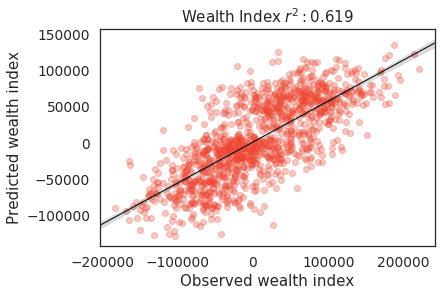

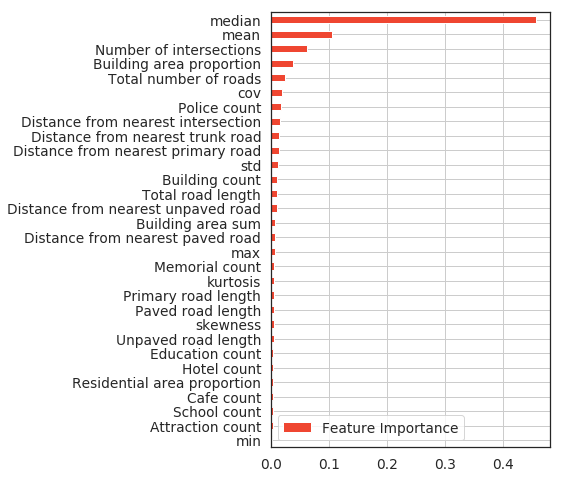

Socioeconomic indicator: Log Wealth Index
test_neg_mse : -0.1930
[-0.07630743 -0.08513774 -0.0899858  -0.62582999 -0.08767461]
score_time : 0.7141
[0.62975454 0.87249303 0.87547994 0.90381455 0.28884673]
train_neg_mse : -0.1300
[-0.18206272 -0.06553564 -0.17205934 -0.03146547 -0.19881138]
test_r2 : 0.5048
[0.58427822 0.59893826 0.54338079 0.23112195 0.56626292]
fit_time : 2194.7806
[2191.95548868 2200.32131934 2193.97796822 2193.4712894  2194.17678761]
train_r2 : 0.6196
[0.4898923  0.81326293 0.51500608 0.84227984 0.43735061]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=764, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


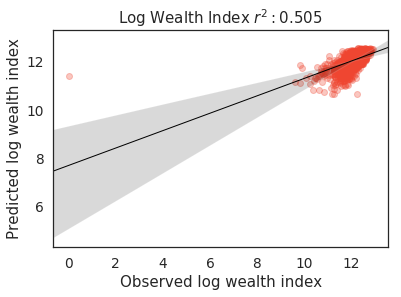

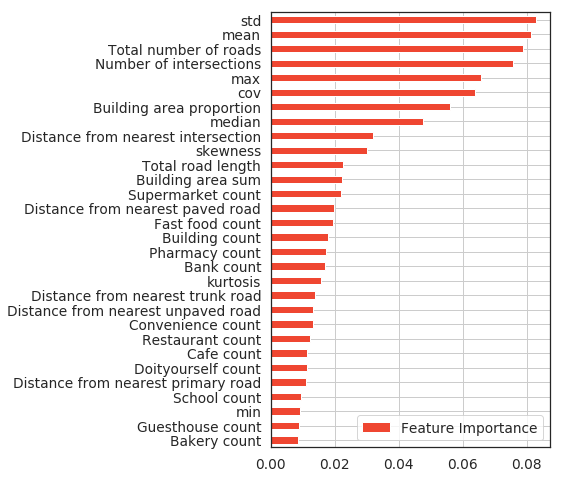

Socioeconomic indicator: Education completed (years)
test_neg_mse : -2.8449
[-2.66124979 -3.20990774 -2.93851129 -2.74826312 -2.66664592]
score_time : 0.8808
[1.43862796 0.55426574 0.96404481 0.65153289 0.79552126]
train_neg_mse : -1.4222
[-1.50973232 -1.49215559 -1.45516223 -1.14257244 -1.51115314]
test_r2 : 0.4807
[0.47410728 0.4782421  0.4397541  0.5277476  0.48374486]
fit_time : 2172.2517
[2163.88620114 2178.82017708 2171.3749218  2178.5571897  2168.62011099]
train_r2 : 0.7419
[0.73058779 0.72095099 0.7384727  0.78958417 0.72990188]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1228, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


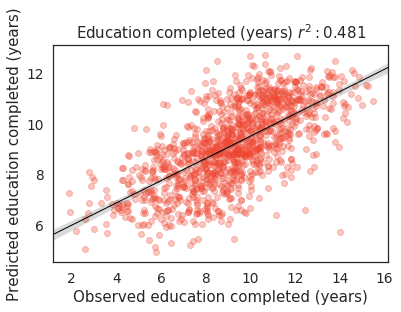

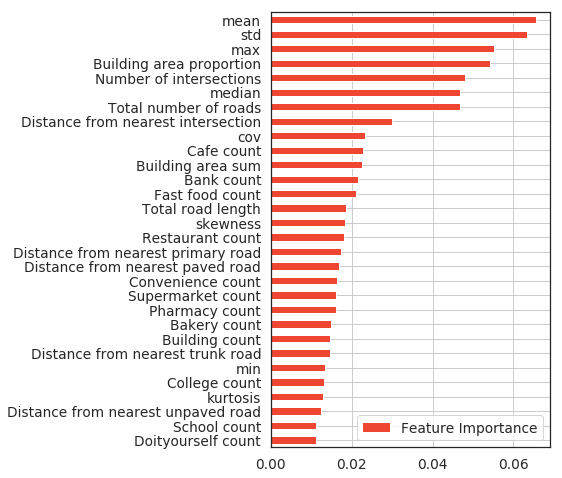

Socioeconomic indicator: Access to electricity
test_neg_mse : -0.0141
[-0.01042678 -0.01319673 -0.01531042 -0.01650435 -0.01481578]
score_time : 0.9905
[0.8502636  0.76864338 1.29742646 0.91570401 1.12060404]
train_neg_mse : -0.0070
[-0.00634357 -0.00822712 -0.0055757  -0.00450725 -0.01031084]
test_r2 : 0.3172
[0.19259679 0.31666662 0.3580677  0.3733152  0.34552727]
fit_time : 2231.4068
[2233.10859179 2225.9255693  2232.33322048 2233.12873483 2232.53772974]
train_r2 : 0.6692
[0.72522782 0.61849776 0.72701177 0.77205549 0.50298133]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1347, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False))])


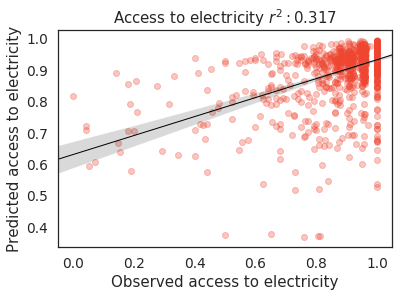

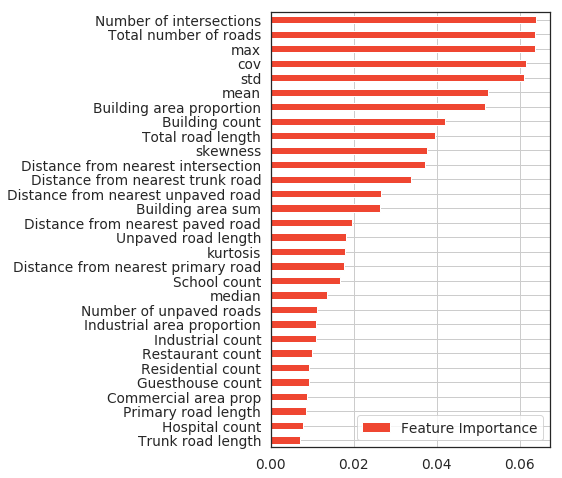

Socioeconomic indicator: Access to water (minutes)
test_neg_mse : -64.0659
[-160.31047002  -63.53610955  -45.676258    -24.29777086  -26.50908299]
score_time : 0.6632
[1.3070488  0.77350307 0.40805769 0.34000087 0.48726201]
train_neg_mse : -47.9218
[-11.69901688 -53.97835939 -60.05557467 -50.27606262 -63.60002791]
test_r2 : 0.0391
[ 0.05227595  0.07167961 -0.02628903  0.00858799  0.08904823]
fit_time : 2162.2469
[2137.81544757 2163.44335818 2173.5224781  2169.00174117 2167.45133448]
train_r2 : 0.3238
[0.71946955 0.19481969 0.17745275 0.35503491 0.172385  ]
Best estimator: Pipeline(memory=None,
     steps=[('regressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=9, min_samples_split=7,
           min_weight_fraction_leaf=0.0, n_estimators=495, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=

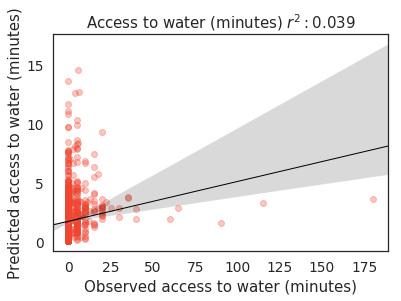

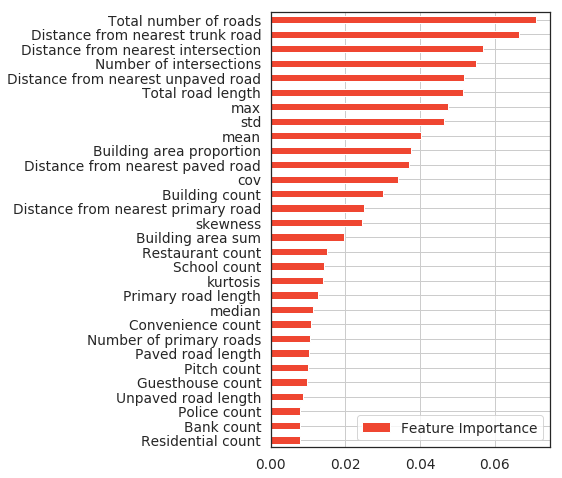

In [8]:
predictions = model_utils.evaluate_model(
    data=dhs,
    feature_cols=osm_ntl_cols, 
    indicator_cols=indicators,
    scoring=scoring,
    model_type='random_forest', 
    refit='r2', 
    search_type='random', 
    n_splits=5, 
    n_iter=50, 
    plot_importance=True
)